# Clustering Analysis
## Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method. Dataset Link: https://www.kaggle.com/datasets/uciml/irisris

# Import necessary libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the Iris dataset

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
iris_data = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Preprocess the data

In [3]:
# Remove the 'species' column as it's not needed for clustering
iris_features = iris_data.drop(columns=['species'])

# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_features)

# Display the scaled data
print(iris_scaled[:5])


[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


# Implement K-Means and determine the optimal number of clusters using the Elbow Method

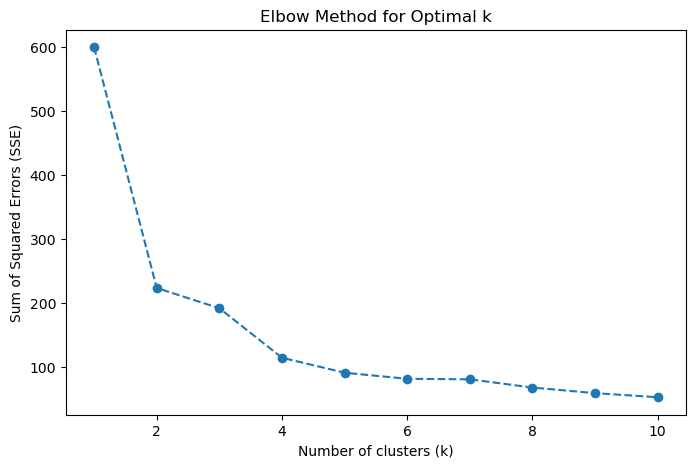

In [4]:
# Determine the number of clusters using the Elbow Method
sse = []  # Sum of squared distances to the closest cluster center
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    sse.append(kmeans.inertia_)  # Inertia represents within-cluster sum of squared errors

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Fit the K-Means model with the optimal number of clusters

In [5]:
# Fit K-Means with the optimal number of clusters (for example, k=3 based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_scaled)

# Add the cluster labels to the original dataset
iris_data['Cluster'] = kmeans.labels_

# Display the dataset with cluster labels
print(iris_data.head())

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

   sepal_length  sepal_width  petal_length  petal_width species  Cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        2
2           4.7          3.2           1.3          0.2  setosa        2
3           4.6          3.1           1.5          0.2  setosa        2
4           5.0          3.6           1.4          0.2  setosa        1
Cluster Centers:
[[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]


# Evaluate the clustering performance using the Silhouette score

In [7]:
# Calculate the Silhouette score
silhouette_avg = silhouette_score(iris_scaled, kmeans.labels_)
print(f'Silhouette Score for {kmeans.n_clusters} clusters: {silhouette_avg}')

Silhouette Score for 3 clusters: 0.4787241921049546
